In [1]:
from matplotlib import pyplot as plt
from google.cloud import bigquery

In [2]:
#This JSON file contains the necessary credentials to authenticate securely with Google Cloud services.
#If you intend to run this notebook, you must first create a service account on Google Cloud Console, 
#grant it BigQuery User permissions, and download the JSON key.

client = bigquery.Client.from_service_account_json("pleaseuseyourownkey.json")

In [3]:
#Shows which traffic source/medium combinations generated the most transactions and revenue on August 1, 2017.
query = """
SELECT
  CONCAT(trafficSource.source, "/", trafficSource.medium) AS source_medium,
  SUM(totals.transactionRevenue) AS transactionRevenue,
  SUM(totals.transactions) AS total_transactions,
  SUM(totals.totalTransactionRevenue) AS total_transaction_revenue
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`
WHERE
  totals.transactions > 0
GROUP BY
  source_medium
ORDER BY
  total_transactions DESC
"""
df = client.query(query).result().to_dataframe()
df.head()

C:\Users\ezgis\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1962: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,source_medium,transactionRevenue,total_transactions,total_transaction_revenue
0,(direct)/(none),8292980000,44,8872040000
1,mail.google.com/referral,11960000,1,17960000


C:\Users\ezgis\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1962: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


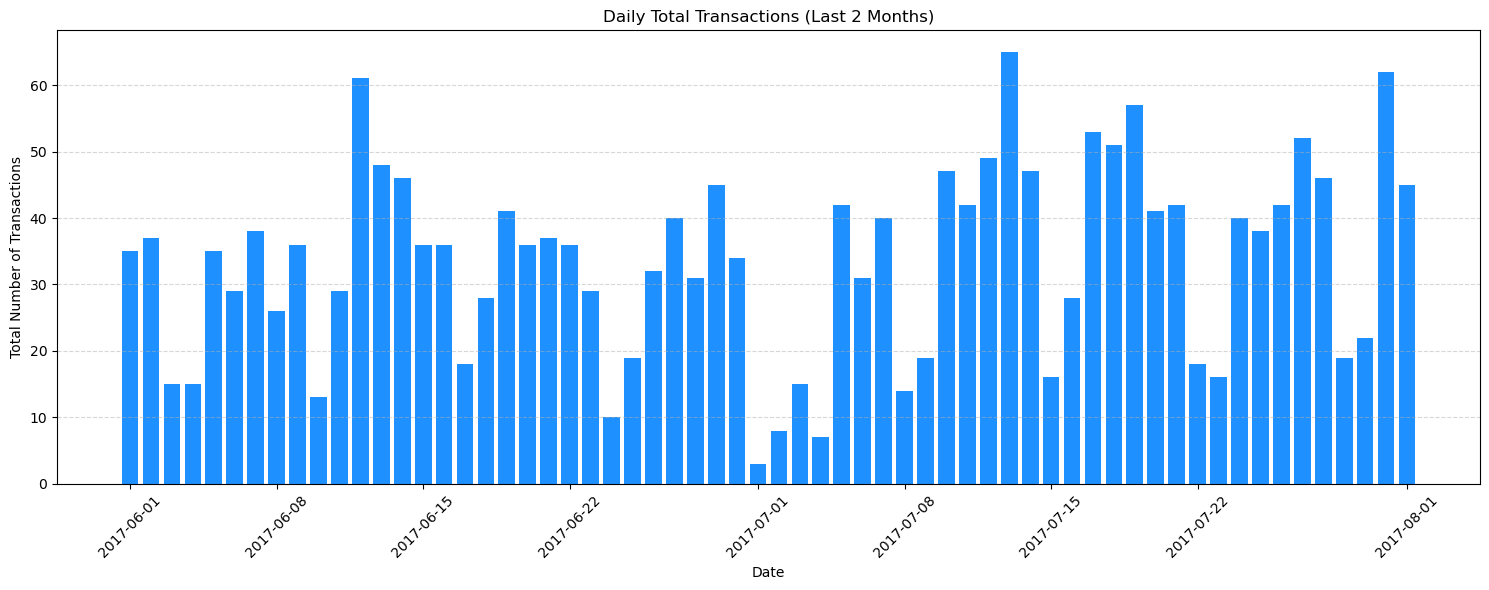

In [4]:
# This query calculates the total number of daily transactions from the Google Analytics sample dataset.
# The 'date' field is stored as a string, so it is parsed using PARSE_DATE.
query = """
SELECT 
  SUM(totals.transactions) AS total_transactions, 
  PARSE_DATE('%Y%m%d', date) AS datevalue
FROM 
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE 
  PARSE_DATE('%Y%m%d', date) >= DATE_SUB(PARSE_DATE('%Y%m%d', '20170801'), INTERVAL 2 MONTH)
GROUP BY 
  datevalue
ORDER BY 
  datevalue DESC
"""
df1 = client.query(query).result().to_dataframe()

# Plotting the daily transaction totals as a bar chart.

plt.figure(figsize=(15, 6))
plt.bar(df1['datevalue'], df1['total_transactions'], color='dodgerblue')
plt.xlabel('Date')
plt.ylabel('Total Number of Transactions')
plt.title('Daily Total Transactions (Last 2 Months)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


C:\Users\ezgis\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1962: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


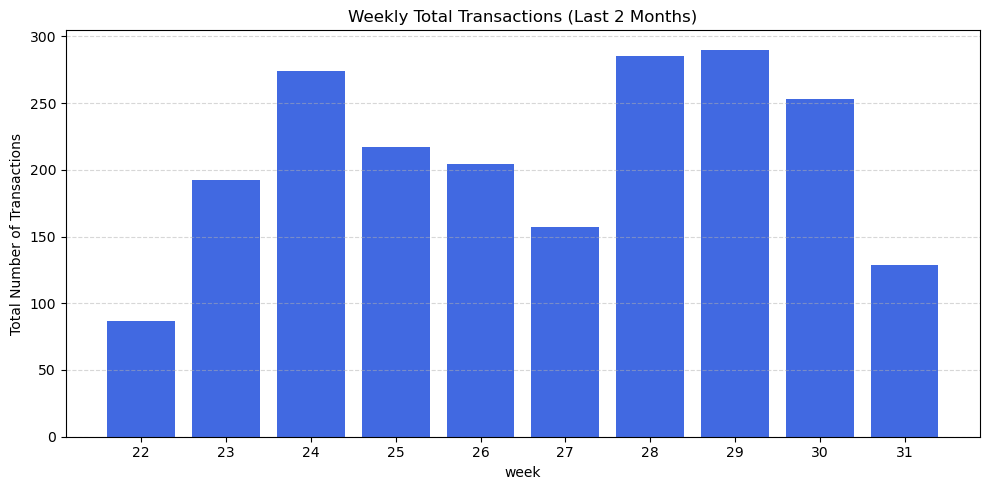

In [5]:
# This query calculates weekly total transactions using the EXTRACT(WEEK FROM date) function.
query = """
SELECT
  SUM(totals.transactions) AS total_transactions,
  EXTRACT(WEEK FROM PARSE_DATE('%Y%m%d', date)) AS week
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
  PARSE_DATE('%Y%m%d', date) >= DATE_SUB(PARSE_DATE('%Y%m%d', '20170801'), INTERVAL 2 MONTH)
GROUP BY
  week
ORDER BY
  week DESC
"""
df2 = client.query(query).result().to_dataframe()

# Plotting weekly total transactions as a bar chart.

plt.figure(figsize=(10, 5))
plt.bar(df2['week'], df2['total_transactions'], color='royalblue')
plt.xlabel('week')
plt.ylabel('Total Number of Transactions')
plt.title('Weekly Total Transactions (Last 2 Months)')
plt.xticks(df2['week'])  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


C:\Users\ezgis\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1962: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


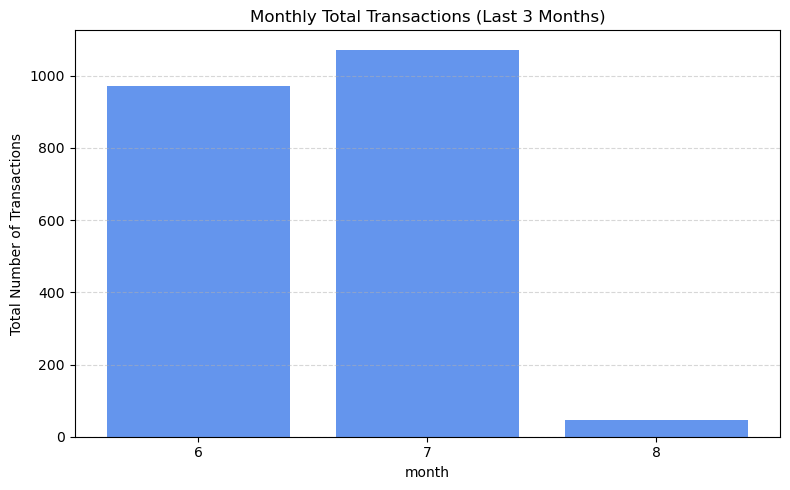

In [6]:
# This query extracts monthly total transactions from the dataset using the MONTH() function.
query = """
SELECT
  SUM(totals.transactions) AS total_transactions,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m%d', date)) AS month
FROM
  `bigquery-public-data.google_analytics_sample.ga_sessions_*`
WHERE
  PARSE_DATE('%Y%m%d', date) >= DATE_SUB(PARSE_DATE('%Y%m%d', '20170801'), INTERVAL 2 MONTH)
GROUP BY
  month
ORDER BY
  month DESC
"""
df3= client.query(query).result().to_dataframe()

# Plotting monthly total transactions as a bar chart.

plt.figure(figsize=(8, 5))
plt.bar(df3['month'], df3['total_transactions'], color='cornflowerblue')
plt.xlabel('month')
plt.ylabel('Total Number of Transactions')
plt.title('Monthly Total Transactions (Last 3 Months)')
plt.xticks(df3['month'])  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [7]:
# This query lists products from the "Electronics" and "Drinkware" categories with their total product revenue.
# The product revenue is divided by 1,000,000 for scaling, and products are ordered by revenue in descending order.
query = """
SELECT 
  product.v2ProductName AS ProdName,
  ROUND(SUM(product.productRevenue) / 1000000, 2) AS productRevenue
FROM 
  `bigquery-public-data.google_analytics_sample.ga_sessions_20170801`,
  UNNEST(hits) AS hits,
  UNNEST(hits.product) AS product
WHERE 
  product.productRevenue IS NOT NULL
  AND product.v2ProductCategory IN ('Drinkware', 'Electronics')
GROUP BY 
  product.v2ProductName
ORDER BY 
  productRevenue DESC
LIMIT 100
"""
df4 = client.query(query).result().to_dataframe()
df4.head()


C:\Users\ezgis\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1962: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,ProdName,productRevenue
0,Google 17oz Stainless Steel Sport Bottle,1094.48
1,Google Power Bank,471.78
2,26 oz Double Wall Insulated Bottle,463.05
3,Clip-on Compact Charger,86.80
4,Foam Can and Bottle Cooler,58.65


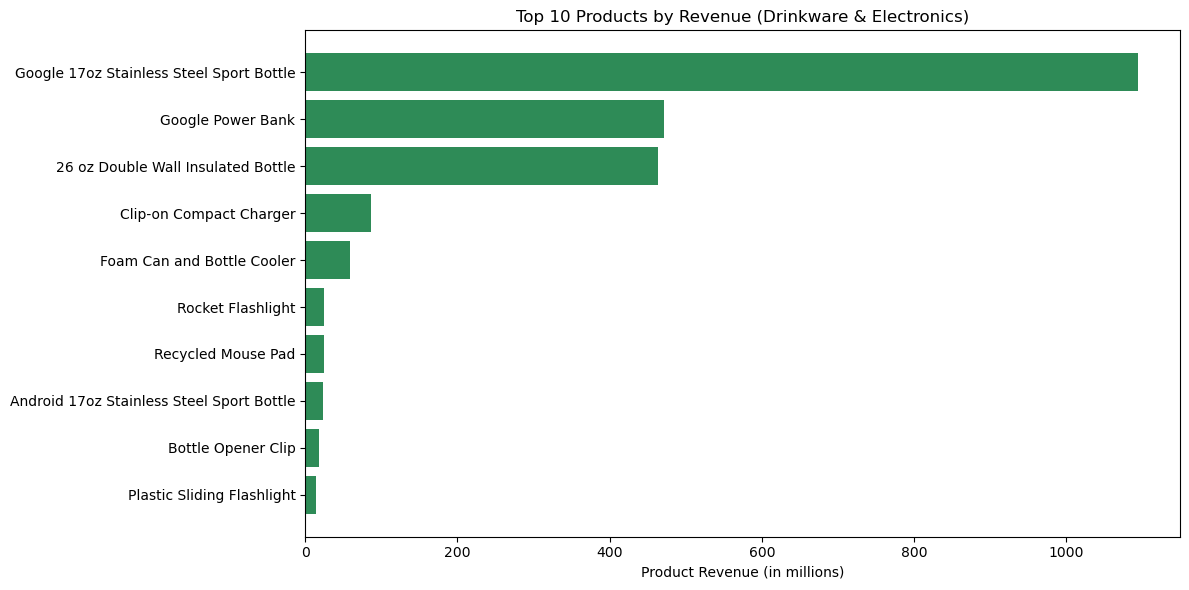

In [8]:
# Plotting the top 10 products by revenue as a horizontal bar chart.
top10 = df4.head(10)
plt.figure(figsize=(12, 6))
plt.barh(top10['ProdName'], top10['productRevenue'], color='seagreen')
plt.xlabel('Product Revenue (in millions)')
plt.title('Top 10 Products by Revenue (Drinkware & Electronics)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
